# 1 - Importing Dependencies

In [55]:
import pandas as pd              #python package for data analysis
import numpy as np               #python package for arrays handling
import seaborn as sns            #python package for data visualization
import matplotlib.pyplot as plt  #python package for data visualization
import neattext as nt            #python package for text data cleaning
import nltk                       #python package for text data analysis
from nltk.stem import WordNetLemmatizer   #python package for text lemmatization
from wordcloud import WordCloud           #python package for word clouds

# 2 - Reading the Data

In [56]:
news_df=pd.read_csv('Huff_news.csv')

In [57]:
news_df.head(2)

,Unnamed: 0,authors,category,date,headline,link,short_description
0,0,Rahel Gebreyes,MEDIA,31/01/2015,HuffPost's DC Chief Responds To Obama's Warnin...,https://www.huffingtonpost.com/entry/obama-cri...,NaN
1,1,Paul Brandeis Raushenbush,RELIGION,31/01/2015,Sexism: The Original Sin Of The Church,https://www.huffingtonpost.com/entry/sexism-ch...,NaN


### 3 - Joining the 'headline' and 'short_descriptions' data columns

In [58]:
news_df['news_text']=news_df.apply(lambda x:str(x['headline'])+str(' ')+str(x['short_description']),axis=1)

### Dropping Un-necessary Data Columns

In [59]:
news_df.drop(['Unnamed: 0', 'authors', 'link','short_description'],axis=1,inplace=True)

### Checking Null Values

In [60]:
news_df.isnull().sum()

category     0
date         0
headline     3
news_text    0
dtype: int64

In [61]:
news_df.dropna(axis=1,inplace=True)  #dropping null values

### Data Visualizations

In [62]:
text=''.join(news_df['news_text'])

In [63]:
text=nt.remove_stopwords(text)
text=nt.remove_special_characters(text)
text=nt.remove_shortwords(text,3)

### Most Used Word in News Text

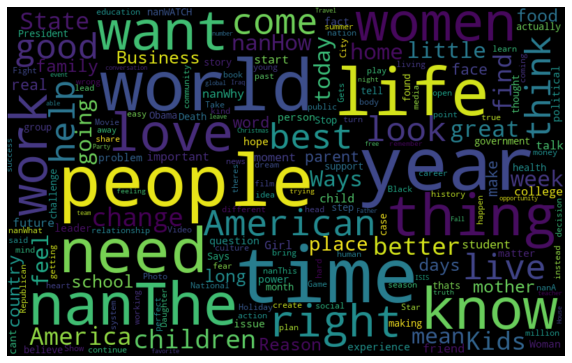

In [64]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### New Categories

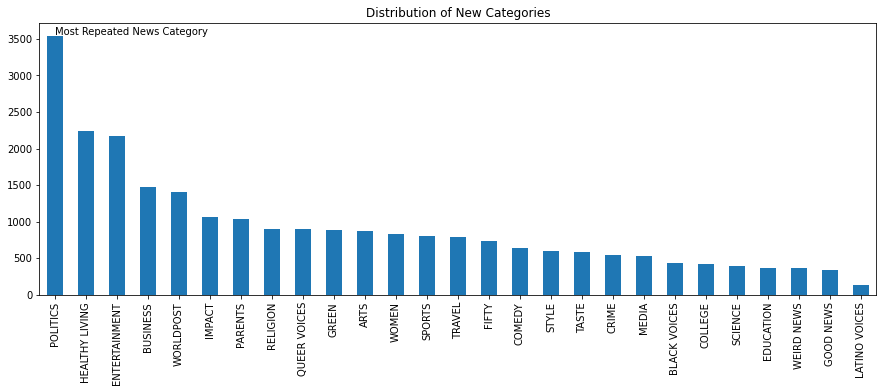

In [65]:
plt.figure(figsize=(15,5))
news_df.category.value_counts().plot(kind="bar")
plt.annotate("Most Repeated News Category",xy=(0,3550))
plt.xticks(rotation=90)
plt.title("Distribution of New Categories");

In [66]:
def text_cleaning(text):
    text=nt.fix_contractions(text)               #I'm -->I am
    text=nt.remove_special_characters(text)      #(),&,<,^...
    text=nt.remove_stopwords(text)               #is,are,the,..
    text=nt.remove_puncts(text)                  #,.:;
    text=nt.remove_bad_quotes(text)              #'b''
    text=nt.remove_emojis(text)                  #emojis
    text=nt.remove_numbers(text)                 #1,2,3,...
    text=nt.remove_shortwords(text,3)            #removing short words of length 3 
    return text

In [67]:
news_df['news_text']=news_df['news_text'].apply(lambda x:text_cleaning(x))

### Lemmatization

In [68]:
# Create a WordNet lemmatizer object
lemmatizer = WordNetLemmatizer()

In [69]:
def text_lemmatization(text):
    # Tokenize the sentence into individual words
    words = nltk.word_tokenize(text)
    # Lemmatize each word in the sentence
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [70]:
news_df['news_text']=news_df['news_text'].apply(lambda x:text_lemmatization(x))

### Text Vectorization

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer  #text vectorizing using Tfidf vectorizer
vect=TfidfVectorizer(max_features=4000)  #creating object of tfidf vectorizer
X=vect.fit_transform(news_df.news_text)  #vectorizing news_text 

In [72]:
y=news_df['category']   

### Data Balancing

In [73]:
#our data is imbalanced so we balance it using over sampling technique SMOTE

In [74]:
from imblearn.over_sampling import SMOTE
over_sampling=SMOTE()
X,y=over_sampling.fit_resample(X,y)

### Balanced Data

<AxesSubplot:>

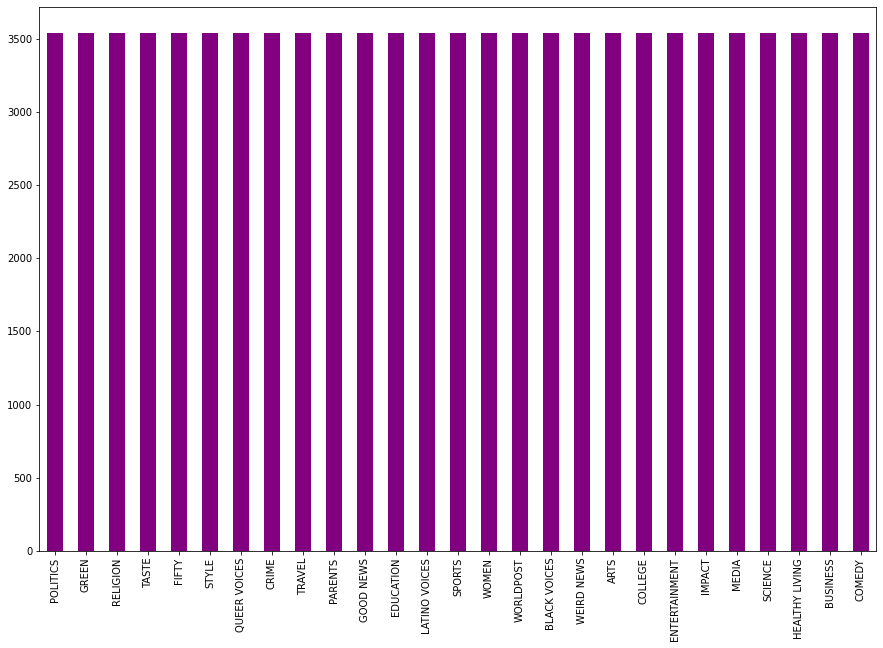

In [75]:
plt.figure(figsize=(15,10))
y.value_counts().plot(kind='bar',color='purple')

### Splitting Data into Training and Testing

In [76]:
from sklearn.model_selection import train_test_split  #importing train test split from sklearn

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42,shuffle=True)

+ ==================================================================================================== +
			1-For Support Vector Classifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8259031353342543
--------------------------------------------------
F1 :  [0.81733021 0.91681416 0.74069401 0.93380199 0.66754271 0.94383324
 0.94431818 0.72313084 0.80892449 0.92103677 0.84057971 0.71335312
 0.80634921 0.99717992 0.89464178 0.90555238 0.69704314 0.86567164
 0.89470481 0.90668272 0.84382567 0.86714116 0.92147806 0.85832839
 0.55641026 0.83034648 0.77275621]
--------------------------------------------------
Reacll :  [0.78959276 0.8779661  0.66327684 0.90056497 0.86101695 0.92090395
 0.93898305 0.69943503 0.79977376 0.86425339 0.78644068 0.67986425
 0.71751412 1.         0.83954802 0.89378531 0.81242938 0.78644068
 0.83050847 0.85084746 0.78757062 0.82692308 0.90169492 0.8180791
 0.98079

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


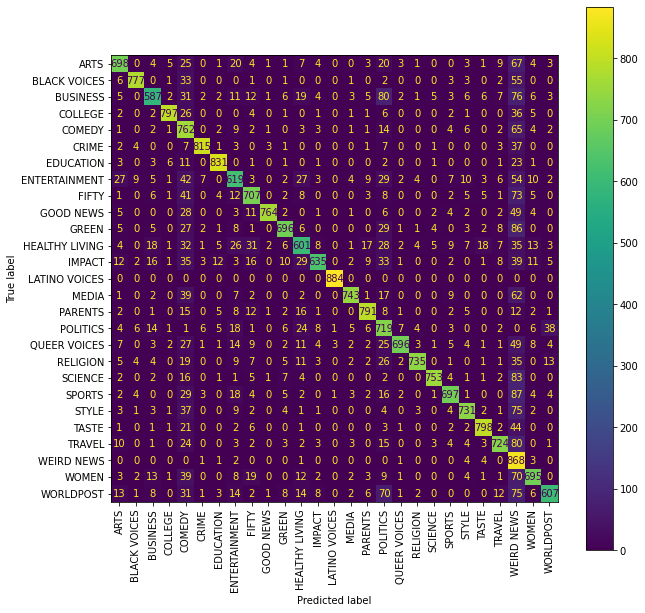

							-----------------------------------------------------------
							 Time for detection (Support Vector Classifier) : 3399.897 seconds...
							-----------------------------------------------------------



c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+ ==================================================================================================== +
			2-For LogisitcRegression The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7013688308426472
--------------------------------------------------
F1 :  [0.65982906 0.76546091 0.58418829 0.84222874 0.54179567 0.82606232
 0.86036036 0.54769231 0.63196571 0.79345372 0.73910517 0.55027092
 0.59520807 0.96428571 0.76738883 0.73467113 0.62060302 0.7118855
 0.77703927 0.78023256 0.71243669 0.73820225 0.83488755 0.72666294
 0.4732376  0.61261261 0.67430639]
--------------------------------------------------
Reacll :  [0.65497738 0.74124294 0.54689266 0.81129944 0.59322034 0.82372881
 0.86327684 0.50282486 0.58371041 0.79524887 0.71864407 0.51696833
 0.53333333 0.97737557 0.76045198 0.74463277 0.55819209 0.64632768
 0.72655367 0.75819209 0.71525424 0.74321267 0.85988701 0.73446328
 0.81920904 0.5

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


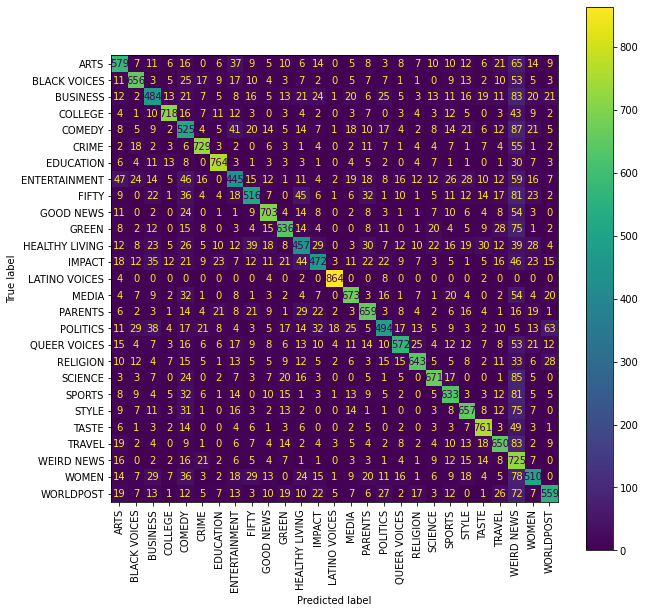

							-----------------------------------------------------------
							 Time for detection (LogisitcRegression) : 58.421 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For NaiveBayesClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.705680438695634
--------------------------------------------------
F1 :  [0.61643059 0.71817676 0.58990944 0.83526171 0.546875   0.78670635
 0.81168177 0.54008439 0.62857143 0.78081485 0.73396675 0.52614016
 0.61356932 0.8917794  0.78250863 0.68221574 0.55633355 0.72095808
 0.76977153 0.78531702 0.72840203 0.72515269 0.81149194 0.74511931
 0.69171975 0.62187872 0.68119266]
--------------------------------------------------
Reacll :  [0.61538462 0.7299435  0.51525424 0.85649718 0.47457627 0.8960452
 0.91073446 

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


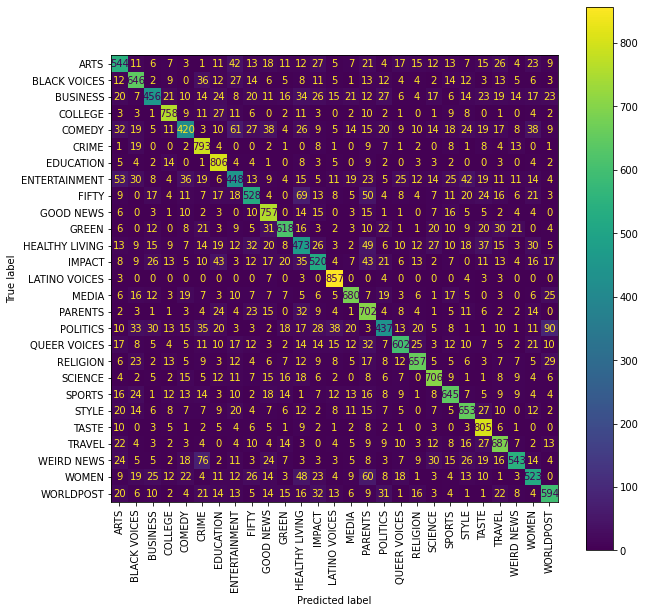

							-----------------------------------------------------------
							 Time for detection (NaiveBayesClassifier) : 6.457 seconds...
							-----------------------------------------------------------



,Model,Accuracy,Precision,Recall,F1_Score,Confusion Matrix
0,Support Vector Classifier,0.825903,"[0.8470873786407767, 0.9592592592592593, 0.838...","[0.7895927601809954, 0.8779661016949153, 0.663...","[0.8173302107728339, 0.9168141592920354, 0.740...","[[698, 0, 4, 5, 25, 0, 1, 20, 4, 1, 1, 7, 4, 0..."
1,LogisitcRegression,0.701369,"[0.6647531572904707, 0.7913148371531966, 0.626...","[0.6549773755656109, 0.7412429378531074, 0.546...","[0.6598290598290598, 0.7654609101516919, 0.584...","[[579, 7, 11, 6, 16, 0, 6, 37, 9, 5, 10, 6, 14..."
2,NaiveBayesClassifier,0.705680,"[0.6174801362088536, 0.7067833698030634, 0.689...","[0.6153846153846154, 0.7299435028248588, 0.515...","[0.6164305949008498, 0.718176764869372, 0.5899...","[[544, 11, 6, 7, 3, 1, 11, 42, 13, 18, 11, 12,..."


In [78]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report, plot_confusion_matrix

# check the performance on diffrent regressor
models = []
models.append(('Support Vector Classifier', svm.SVC()))
models.append(('LogisitcRegression', LogisticRegression()))
models.append(('NaiveBayesClassifier', MultinomialNB()))

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)
    
    # evaluate model
    scores = cross_val_score(clf, X, y, cv=cv, n_jobs=-1)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('cross validation accuracy : ', np.mean(scores))
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(clf, X_test, y_test,ax=ax)
    plt.xticks(rotation=90)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})